In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user

In [5]:
print(df.head())

   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4

In [6]:
print(df.isnull().sum())

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [7]:
df.drop(columns=["user/birthdayUnix", "review/timeStruct", "user/profileName"], inplace=True)
df = df.drop(columns=["review/text"])

In [8]:
# Convert Unix timestamp to datetime
df["review/timeUnix"] = pd.to_datetime(df["review/timeUnix"], unit="s")

In [9]:
# Extract year, month, and weekday as new features
df["review/year"] = df["review/timeUnix"].dt.year
df["review/month"] = df["review/timeUnix"].dt.month
df["review/weekday"] = df["review/timeUnix"].dt.weekday  # Monday = 0, Sunday = 6

In [10]:
# Drop the original Unix timestamp column
df.drop(columns=["review/timeUnix"], inplace=True)

In [12]:
import datetime
# Convert seconds to account creation year
df["account_creation_year"] = pd.to_datetime(df["user/ageInSeconds"], unit="s").dt.year
df["account_age"] = 2025 - df["account_creation_year"]
df.drop(columns=["user/ageInSeconds"], inplace=True)
print(df["account_age"].describe())

count    7856.000000
mean       18.193610
std        10.669794
min       -59.000000
25%        15.000000
50%        21.000000
75%        24.000000
max        33.000000
Name: account_age, dtype: float64


In [13]:
df["user/gender"] = df["user/gender"].apply(lambda x: np.random.choice(["Male", "Female"]) if pd.isnull(x) else x)

In [14]:
print(df.isnull().sum())

index                        0
beer/ABV                     0
beer/beerId                  0
beer/brewerId                0
beer/name                    0
beer/style                   0
review/appearance            0
review/aroma                 0
review/overall               0
review/palate                0
review/taste                 0
user/gender                  0
review/year                  0
review/month                 0
review/weekday               0
account_creation_year    29644
account_age              29644
dtype: int64


In [16]:
df.drop(columns=['account_creation_year', 'account_age'], inplace=True)

In [17]:
print(df.isnull().sum())

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
user/gender          0
review/year          0
review/month         0
review/weekday       0
dtype: int64


In [18]:
print(df.describe())

              index      beer/ABV   beer/beerId  beer/brewerId  \
count  37500.000000  37500.000000  37500.000000   37500.000000   
mean   24951.887573      7.403725  21861.152027    3036.595120   
std    14434.009669      2.318145  18923.130832    5123.084675   
min        0.000000      0.100000    175.000000       1.000000   
25%    12422.500000      5.400000   5441.000000     395.000000   
50%    24942.500000      6.900000  17538.000000    1199.000000   
75%    37416.750000      9.400000  34146.000000    1315.000000   
max    49999.000000     57.700000  77207.000000   27797.000000   

       review/appearance  review/aroma  review/overall  review/palate  \
count       37500.000000  37500.000000     37500.00000   37500.000000   
mean            3.900053      3.873240         3.88944       3.854867   
std             0.588778      0.680865         0.70045       0.668068   
min             0.000000      1.000000         0.00000       1.000000   
25%             3.500000      3.500000  

# EDA

Target Variable Analysis (review/overall)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

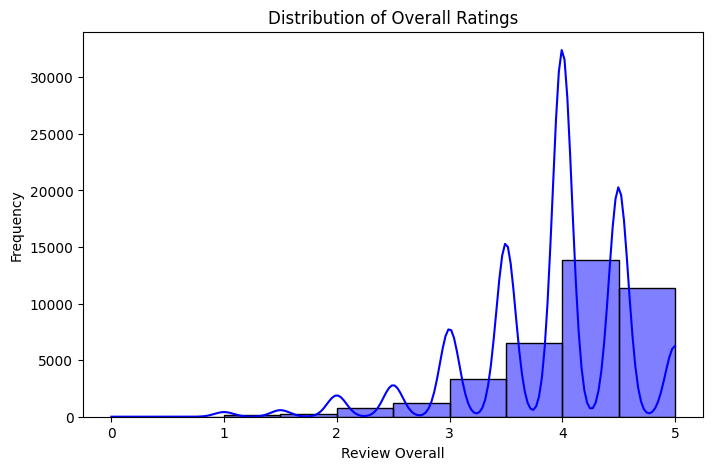

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['review/overall'], bins=10, kde=True, color="blue")
plt.title("Distribution of Overall Ratings")
plt.xlabel("Review Overall")
plt.ylabel("Frequency")
plt.show()

Top 10 Most Common Beer Styles

<ipython-input-23-e9c7e311593f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["beer/style"], order=df["beer/style"].value_counts().index[:10], palette="magma")


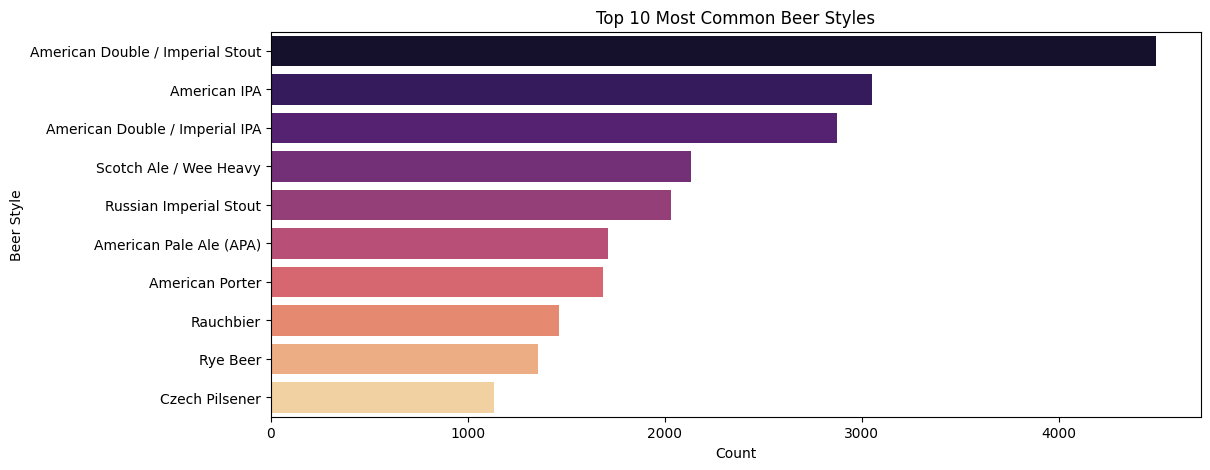

In [23]:
# Top 10 Most Common Beer Styles
if "beer/style" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(y=df["beer/style"], order=df["beer/style"].value_counts().index[:10], palette="magma")
    plt.title("Top 10 Most Common Beer Styles")
    plt.xlabel("Count")
    plt.ylabel("Beer Style")
    plt.show()
else:
    print("Column 'beer/style' not found in the dataset.")

Correlation heatmap

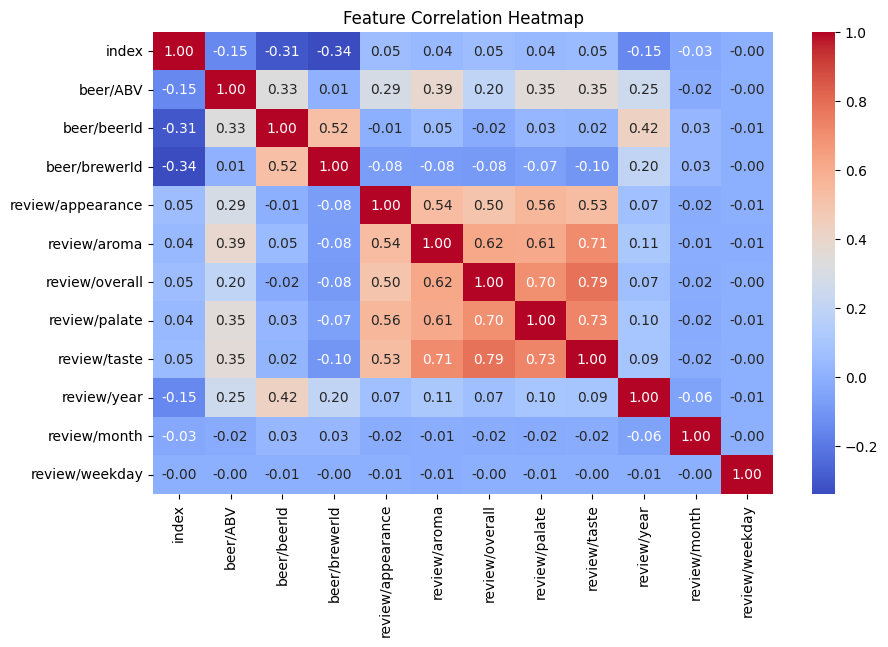

In [25]:
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Ratings trend over time

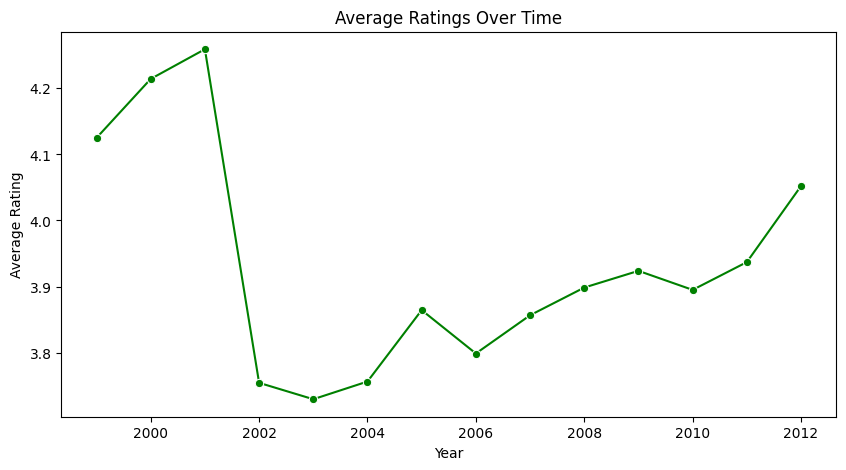

In [26]:
df['review/year'] = df['review/year'].astype(int)
yearly_ratings = df.groupby("review/year")["review/overall"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker="o", color="green")
plt.title("Average Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

Boxplot for gender differences in ratings

<ipython-input-27-8b00b08f1f3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["user/gender"], y=df["review/overall"], palette="coolwarm")


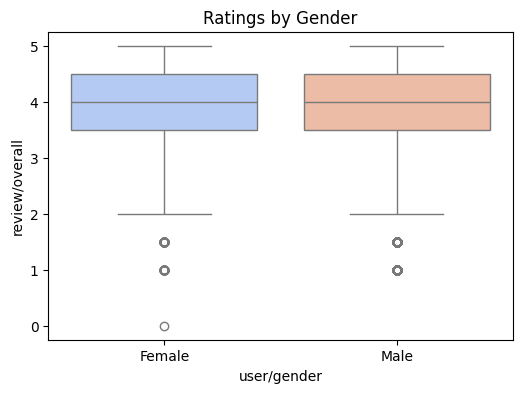

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["user/gender"], y=df["review/overall"], palette="coolwarm")
plt.title("Ratings by Gender")
plt.show()

Feature Engineering

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [30]:
df.drop(columns=['user/birthdayUnix', 'review/timeUnix'], inplace=True, errors='ignore')

In [31]:
# One-Hot Encode 'beer/style'
df = pd.get_dummies(df, columns=['beer/style'], drop_first=True)

In [33]:
# Label Encode 'user/gender'
if 'user/gender' in df.columns:
    le = LabelEncoder()
    df['user/gender'] = le.fit_transform(df['user/gender'])

Scaling Numerical Features

In [34]:
num_cols = ['beer/ABV', 'review/appearance', 'review/aroma',
            'review/palate', 'review/taste', 'review/year']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Creating New Features

In [35]:
# Binning ABV into categories
df['ABV_category'] = pd.cut(df['beer/ABV'], bins=[0, 4, 7, 10, 15, 100],
                            labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

In [38]:
# Interaction feature for ratings
df['avg_rating'] = df[['review/appearance', 'review/aroma', 'review/palate', 'review/taste']].mean(axis=1)

In [39]:
print(df.head())

   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163 -1.036931        46634          14338                   Chiostro   
1   8135  1.551380         3003            395   Bearded Pat's Barleywine   
2  10529 -1.166347          961            365       Naughty Nellie's Ale   
3  44610 -1.295762          429              1            Pilsner Urquell   
4  37062 -1.295762         4904           1417  Black Sheep Ale (Special)   

   review/appearance  review/aroma  review/overall  review/palate  \
0           0.169755      0.186177             4.0       0.217246   
1           0.169755     -0.548192             3.5      -0.531191   
2          -0.679472      0.186177             3.5      -0.531191   
3          -1.528700     -1.282561             2.5      -1.279627   
4           0.169755     -1.282561             3.0      -0.531191   

   review/taste  ...  beer/style_Vienna Lager  beer/style_Weizenbock  \
0      0.108249  ...                    False     

# Model Evaluation

In [67]:
X = df.drop(['review/overall', 'index'], axis=1)
y = df['review/overall']

# Using LGBM

In [69]:
import lightgbm as lgb

In [55]:
# Drop any columns that are not relevant or contain object types
df = df.drop(columns=['beer/name'], errors='ignore')
df = df.select_dtypes(include=[np.number])

In [56]:
X = df.drop(columns=['review/overall'])
y = df['review/overall']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 12
[LightGBM] [Info] Start training from score 3.888667


LGBMRegressor()

In [73]:
# Model evaluation
y_pred_lgb = lgb_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
# LGBM Evaluation
lgb_rmse = mean_squared_error(y_test, y_pred_lgb) ** 0.5
lgb_mae = mean_absolute_error(y_test, y_pred_lgb)
lgb_r2 = r2_score(y_test, y_pred_lgb)

In [76]:
print(f"LGBM RMSE: {lgb_rmse}, MAE: {lgb_mae}, R²: {lgb_r2}")

LGBM RMSE: 0.39195263284993564, MAE: 0.29827402744861176, R²: 0.6876979560193968


# CatBoost

In [78]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


In [79]:
from catboost import CatBoostRegressor

In [81]:
catboost_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, verbose=0)

In [82]:
catboost_model.fit(X_train, y_train)

In [83]:
y_pred_catboost = catboost_model.predict(X_test)

In [84]:
catboost_rmse = mean_squared_error(y_test, y_pred_catboost) ** 0.5
catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_r2 = r2_score(y_test, y_pred_catboost)

In [85]:
print(f"CatBoost RMSE: {catboost_rmse}, MAE: {catboost_mae}, R²: {catboost_r2}")

CatBoost RMSE: 0.3920725656938489, MAE: 0.2976670823876841, R²: 0.6875068053568483


#Model Validation

In [86]:
# For LGBM
lgb_rmse = mean_squared_error(y_test, y_pred_lgb) ** 0.5
lgb_mae = mean_absolute_error(y_test, y_pred_lgb)
lgb_r2 = r2_score(y_test, y_pred_lgb)

print(f"LGBM RMSE: {lgb_rmse}, MAE: {lgb_mae}, R²: {lgb_r2}")

LGBM RMSE: 0.39195263284993564, MAE: 0.29827402744861176, R²: 0.6876979560193968


In [88]:
catboost_rmse = mean_squared_error(y_test, y_pred_catboost) ** 0.5
catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_r2 = r2_score(y_test, y_pred_catboost)
print(f"CatBoost RMSE: {catboost_rmse}, MAE: {catboost_mae}, R²: {catboost_r2}")

CatBoost RMSE: 0.3920725656938489, MAE: 0.2976670823876841, R²: 0.6875068053568483
